Analysis Results
1.in the Pyber ryder shara data we can see there is more demand in the rural type of demographics, there is less demand in the Suburban area.
2.Urban are is the demand for pyber rides
3.


In [116]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset

# Display the data table for preview


In [117]:
city_data.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [118]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [119]:
city_ride_data = pd.merge(ride_data, city_data, how="left", on=["city", "city"])
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [120]:
urban_cities_data = city_ride_data[city_ride_data["type"] == "Urban"]
urban_cities_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [121]:
suburban_cities_data = city_ride_data[city_ride_data["type"] == "Suburban" ]
suburban_cities_data.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2018-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2018-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2018-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2018-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2018-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [122]:
urban_ride_count = urban_cities_data.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities_data.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities_data.groupby(["city"]).mean()["driver_count"]

In [123]:
suburban_ride_count = suburban_cities_data.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities_data.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities_data.groupby(["city"]).mean()["driver_count"]


In [124]:
rural_cities_data = city_ride_data[city_ride_data["type"] == "Rural" ]
rural_cities_data.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2018-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2018-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2018-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2018-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2018-05-06 08:57:56,51.80,4018025271936,2,Rural


In [125]:
rural_ride_count = rural_cities_data.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities_data.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities_data.groupby(["city"]).mean()["driver_count"]


In [126]:
rural_driver_count

city
Bradshawfurt         7.0
Garzaport            7.0
Harringtonfort       4.0
Jessicaport          1.0
Lake Jamie           4.0
Lake Latoyabury      2.0
Michaelberg          6.0
New Ryantown         2.0
Newtonview           1.0
North Holly          8.0
North Jaime          1.0
Penaborough          6.0
Randallchester       9.0
South Jennifer       7.0
South Marychester    1.0
South Saramouth      7.0
Taylorhaven          1.0
West Heather         4.0
Name: driver_count, dtype: float64

## Bubble Plot of Ride Sharing Data

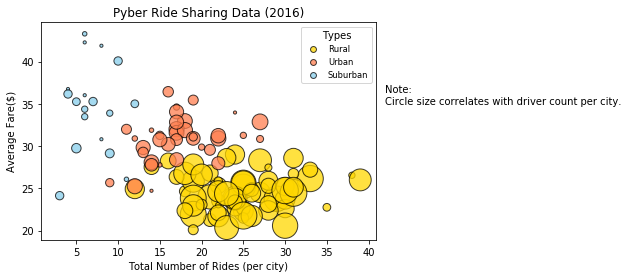

In [127]:
# Obtain the x and y coordinates for each of the three city types


# Build the scatter plots for each city types
plt.scatter(urban_ride_count , urban_avg_fare, s=urban_driver_count*10, color='Gold', edgecolors="black", label = 'Rural', alpha=0.75 )
plt.scatter(suburban_ride_count , suburban_avg_fare, s=suburban_driver_count*10, color='Coral', edgecolors="black", label = 'Urban', alpha=0.75 )
plt.scatter(rural_ride_count, rural_avg_fare, s=rural_driver_count*10, color='SkyBlue', edgecolors="black", label = 'Suburban', alpha=0.75 )

# Incorporate the other graph properties
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (per city)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
lgnd = plt.legend(loc='upper right', title="Types", numpoints=1, ncol=1, fontsize = 'small', fancybox=True)

for handle in lgnd.legendHandles:
    handle.set_sizes([35.0])
# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")
# Save Figure
plt.savefig("bubble_plot")

In [128]:
# Show plot
plt.show()

 #Total Fares by City Type


<function matplotlib.pyplot.show(*args, **kw)>

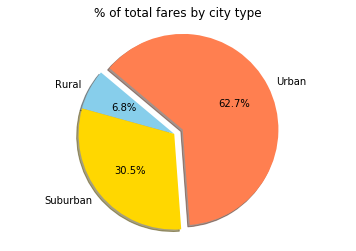

In [132]:
# Calculate Type Percents
t_percent = 100 * (city_ride_data.groupby(["type"]).sum()["fare"] / city_ride_data["fare"].sum())
#creating pie plot
labels = t_percent.keys()
colors = ['SkyBlue', 'Gold', 'Coral']
explode = [0, 0, 0.10]
# Build Pie Chart
plt.pie(t_percent, explode=explode, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', startangle=140
       )
plt.title("% of total fares by city type")
plt.axis("equal")
# Save Figure
plt.show

In [111]:
# Show Figure
plt.show()

## Total Rides by City Type

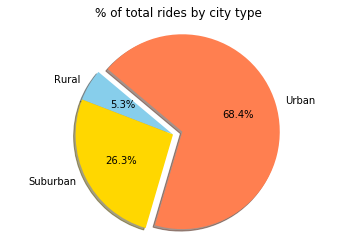

In [133]:
# Calculate Ride Percents
ride_percent = 100 * (city_ride_data.groupby(["type"]).count()["ride_id"] / city_ride_data["ride_id"].count())

labels = ride_percent.keys()
colors = ['SkyBlue', 'Gold', 'Coral']
explode = [0, 0, 0.10]
plt.title("% of total rides by city type")

# Pie Chart measurements
plt.pie(ride_percent, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140, autopct = '%1.1f%%')

plt.axis("equal")


# Show Figure
plt.show()

In [134]:
# Show Figure
plt.show()

## Total Drivers by City Type

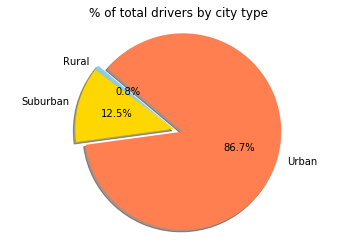

In [135]:
# Calculate Driver Percents
num_driver_percent = 100 * (city_ride_data.groupby(["type"]).sum()["driver_count"] / city_ride_data["driver_count"].sum())


labels =num_driver_percent.keys()
colors = ['SkyBlue', 'Gold', 'Coral']
explode = (0, 0, 0.10)
plt.title("% of total drivers by city type")

# Build Pie Charts
plt.pie(num_driver_percent, explode=explode, labels=labels, colors=colors, shadow=True, autopct = '%1.1f%%', startangle=140
       )
plt.axis("equal")


# Show Figure
plt.show()


In [86]:
# Show Figure
plt.show()